# Data Analysis for Sign Language project
Autors: Karen and Oren

In [1]:
import os
import json
import cv2
import pandas as pd
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'cv2'

### 1.1 Data Stats

In [75]:
data_info = "data/WLASL_v0.3.json"
with open("data/missing.txt", 'r') as file:
    missing = [int(line.strip()) for line in file]

def countMissing(fileName):
    f = open(fileName)
    data = json.load(f)
    lst_missing = {}
    lst_present = {}

    # Count the missing and present videos are each word
    for i in data:
        name = i["gloss"]
        present = 0
        absent = 0
        for j in i["instances"]:
            if int(j["video_id"]) in missing:
                absent = absent + 1
            else:
                present = present + 1
        lst_missing[name] = absent
        lst_present[name] = present

    # Count number of words
    print(f"Number of unique words in a data: {len(lst_present)}")

    # Total number of instances without removal of data
    print(f"Total number of instance: {sum(lst_present.values()) + sum(lst_missing.values())}")
    print(f"Average number of instance per word: {(sum(lst_present.values()) + sum(lst_missing.values())) / len(lst_present)}")
    summed_dict = {}
    for key in lst_present.keys():
        summed_dict[key] = lst_present[key] + lst_missing[key]
    print(f"Minimum number of instance per word: {summed_dict[min(summed_dict, key=summed_dict.get)]}")
    print(f"Maximum number of instance per word: {summed_dict[max(summed_dict, key=summed_dict.get)]}")

    # Total number of instances with removal of data
    print(f"Total number of instance after removal: {sum(lst_present.values())}")
    print(f"Average number of instance per word after removal: {sum(lst_present.values()) / len(lst_present)}")
    print(f"Average number of instance per word removed: {sum(lst_missing.values()) / len(lst_present)}")
    print(f"Minimum number of instance per word after removal: {lst_present[min(lst_present, key=lst_present.get)]}")
    print(f"Maximum number of instance per word after removal: {lst_present[max(lst_present, key=lst_present.get)]}")
    print(f"Minimum number of instance per word removed: {lst_missing[min(lst_missing, key=lst_missing.get)]}")
    print(f"Maximum number of instance per word removed: {lst_missing[max(lst_missing, key=lst_missing.get)]}")


countMissing(data_info)

Number of unique words in a data: 2000
Total number of instance: 21083
Average number of instance per word: 10.5415
Minimum number of instance per word: 6
Maximum number of instance per word: 40
Total number of instance after removal: 11980
Average number of instance per word after removal: 5.99
Average number of instance per word removed: 4.5515
Minimum number of instance per word after removal: 2
Maximum number of instance per word after removal: 16
Minimum number of instance per word removed: 0
Maximum number of instance per word removed: 34


### 1.2 Find the lengths of videos and frame rates

In [76]:
stats = pd.DataFrame({'video_id': [], 'fps':[],'width':[],'height':[], 'duration':[]})
for i, file in enumerate(os.listdir('videos')):
    video_file = os.path.join('videos',file)
    video = cv2.VideoCapture(video_file)
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
    if int(major_ver)  < 3 :
        length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
        print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
    else :
        length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = video.get(cv2.CAP_PROP_FPS)
    video_read = video.read()
    if video_read[0]:
        h, w, _ = video_read[1].shape
    stats.loc[i] = [file.replace('.mp4',''), fps, w, h, length/fps]
    video.release()


In [77]:
stats.head()

,video_id,fps,width,height,duration
0,52291,30.000000,640,480,2.733333
1,34114,29.970000,288,192,1.234568
2,60545,29.970000,320,240,3.370037
3,17915,29.970000,288,192,1.001001
4,51940,30.364742,720,400,2.535836


In [78]:
data_info = "data/WLASL_v0.3.json"

f = open(data_info)
data = json.load(f)
metadata = pd.DataFrame.from_dict(data)
f.close()

In [79]:

columns = [
    'bbox',
    'fps',
    'frame_end',
    'frame_start',
    'instance_id',
    'signer_id',
    'source',
    'split',
    'url',
    'variation_id',
    'video_id'
    ]
rearrange = pd.DataFrame(columns=columns)
for i, word in enumerate(data):
    for instance in word['instances']:
        if int(instance['video_id']) in missing:
            continue
        instance['word'] = word
        rearrange.loc[instance['video_id']] = instance
rearrange['video_id'] = pd.to_numeric(rearrange['video_id'])
stats['video_id'] = pd.to_numeric(stats['video_id'])


In [80]:
backup_rearrange = rearrange.copy()
backup_stats = stats.copy()

In [81]:
rearrange.merge(stats, on='video_id', how='left')
rearrange.to_csv('video_labels')

In [70]:
#cols = rearrange.columns
#cols = cols[10:].append(cols[0:10])
#rearrange = rearrange[cols]
rearrange.to_csv('data_info.csv')

In [20]:
for row in rearrange.iterrows():
    video_id = row[1].video_id
    video_file = os.path.join('videos',video_id+'.mp4')
    video = cv2.VideoCapture(video_file)
    video_read = video.read()
    frame = video_read[1]
    video.release()

KeyboardInterrupt: 

OpenCV: Couldn't read video stream from file "videos/65225.mp4"
OpenCV: Couldn't read video stream from file "videos/68011.mp4"
OpenCV: Couldn't read video stream from file "videos/68208.mp4"
OpenCV: Couldn't read video stream from file "videos/68012.mp4"
OpenCV: Couldn't read video stream from file "videos/70212.mp4"
OpenCV: Couldn't read video stream from file "videos/70266.mp4"
OpenCV: Couldn't read video stream from file "videos/07085.mp4"
OpenCV: Couldn't read video stream from file "videos/07086.mp4"
OpenCV: Couldn't read video stream from file "videos/07087.mp4"
OpenCV: Couldn't read video stream from file "videos/07088.mp4"
OpenCV: Couldn't read video stream from file "videos/07089.mp4"
OpenCV: Couldn't read video stream from file "videos/07090.mp4"
OpenCV: Couldn't read video stream from file "videos/07091.mp4"
OpenCV: Couldn't read video stream from file "videos/07092.mp4"
OpenCV: Couldn't read video stream from file "videos/07093.mp4"
OpenCV: Couldn't read video stream from 

(400, 720, 3)


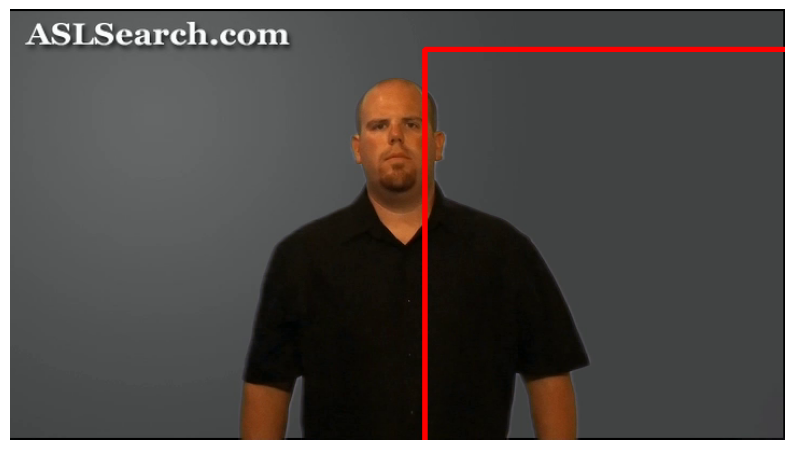

In [9]:
for row in rearrange.iterrows():
    video_id = row[1].video_id
    video_file = os.path.join('videos',video_id+'.mp4')
    video = cv2.VideoCapture(video_file)
    video_read = video.read()
    frame = video_read[1]
    video.release()

## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")
    plt.plot()

img = frame.copy()
bbox = [385, 37, 885, 720]
pt2 = [385,37]
pt1 = [885,720]
cv2.rectangle(img, pt1, pt2, (0, 0, 255), 3)
display_cv2_img(img)
print(img.shape)

<hr>

# motivation
<b>For what purpose was the dataset created? Was there a specific task
in mind? Was there a specific gap that needed to be filled? Please provide
a description.<b>

This dataset was collected from many small datasets, to facilitate the development and evaluation of deep learning-based methods for word-level ASL recognition.


Who created the dataset (e.g., which team, research group) and on
behalf of which entity (e.g., company, institution, organization)?

Who funded the creation of the dataset? If there is an associated grant,
please provide the name of the grantor and the grant name and number.

Any other comments?

# Composition
What do the instances that comprise the dataset represent (e.g., documents, photos, people, countries)? Are there multiple types of instances (e.g., movies, users, and ratings; people and interactions between
them; nodes and edges)? Please provide a description.

How many instances are there in total (of each type, if appropriate)?

Does the dataset contain all possible instances or is it a sample (not
necessarily random) of instances from a larger set? If the dataset is
a sample, then what is the larger set? Is the sample representative of the
larger set (e.g., geographic coverage)? If so, please describe how this
representativeness was validated/verified. If it is not representative of the
larger set, please describe why not (e.g., to cover a more diverse range of
instances, because instances were withheld or unavailable).

What data does each instance consist of? “Raw” data (e.g., unprocessed text or images)or features? In either case, please provide a description.

Is there a label or target associated with each instance? If so, please
provide a description.

Is any information missing from individual instances? If so, please
provide a description, explaining why this information is missing (e.g., because it was unavailable). This does not include intentionally removed
information, but might include, e.g., redacted text.

Are relationships between individual instances made explicit (e.g.,
users’ movie ratings, social network links)? If so, please describe
how these relationships are made explicit.
None explicitly, though the original news

Are there recommended data splits (e.g., training, development/validation, testing)? If so, please provide a description of these
splits, explaining the rationale behind them.

Are there any errors, sources of noise, or redundancies in the
dataset? If so, please provide a description.

Is the dataset self-contained, or does it link to or otherwise rely on
external resources (e.g., websites, tweets, other datasets)? If it links
to or relies on external resources, a) are there guarantees that they will exist, and remain constant, over time; b) are there official archival versions of
the complete dataset (i.e., including the external resources as they existed
at the time the dataset was created); c) are there any restrictions (e.g.,
licenses, fees) associated with any of the external resources that might
apply to a dataset consumer? Please provide descriptions of all external
resources and any restrictions associated with them, as well as links or
other access points, as appropriate.
The dataset is entirely self-contai

Does the dataset contain data that might be considered confidential
(e.g., data that is protected by legal privilege or by doctor–patient
confidentiality, data that includes the content of individuals’ nonpublic communications)? If so, please provide a description.

Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety? If so,
please describe why.

Does the dataset identify any subpopulations (e.g., by age, gender)?
If so, please describe how these subpopulations are identified and provide
a description of their respective distributions within the dataset.

Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other
data) from the dataset? If so, please describe how.

Does the dataset contain data that might be considered sensitive in
any way (e.g., data that reveals race or ethnic origins, sexual orientations, religious beliefs, political opinions or union memberships, or
locations; financial or health data; biometric or genetic data; forms of
government identification, such as social security numbers; criminal
history)? If so, please provide a description.


# Preprocessing/cleaning/labeling
Was any preprocessing/cleaning/labeling of the data done (e.g., discretization or bucketing, tokenization, part-of-speech tagging, SIFT
feature extraction, removal of instances, processing of missing values)? If so, please provide a description. If not, you may skip the remaining questions in this section.

Was the “raw” data saved in addition to the preprocessed/cleaned/labeled data (e.g., to support unanticipated
future uses)? If so, please provide a link or other access point to the
“raw” data.

Is the software that was used to preprocess/clean/label the data available? If so, please provide a link or other access point.

Any other comments?

# Uses
Has the dataset been used for any tasks already? If so, please provide
a description.

Is there a repository that links to any or all papers or systems that
use the dataset? If so, please provide a link or other access point.

What (other) tasks could the dataset be used for?

Is there anything about the composition of the dataset or the way it
was collected and preprocessed/cleaned/labeled that might impact
future uses? For example, is there anything that a dataset consumer
might need to know to avoid uses that could result in unfair treatment of
individuals or groups (e.g., stereotyping, quality of service issues) or other
risks or harms (e.g., legal risks, financial harms)? If so, please provide
a description. Is there anything a dataset consumer could do to mitigate
these risks or harms?

Are there tasks for which the dataset should not be used? If so, please
provide a description.

Any other comments?

# Distribution
Will the dataset be distributed to third parties outside of the entity (e.g., company, institution, organization) on behalf of which the
dataset was created? If so, please provide a description.

How will the dataset will be distributed (e.g., tarball on website, API,
GitHub)? Does the dataset have a digital object identifier (DOI)?

When will the dataset be distributed?

Will the dataset be distributed under a copyright or other intellectual
property (IP) license, and/or under applicable terms of use (ToU)? If
so, please describe this license and/or ToU, and provide a link or other
access point to, or otherwise reproduce, any relevant licensing terms or
ToU, as well as any fees associated with these restrictions.

Have any third parties imposed IP-based or other restrictions on the
data associated with the instances? If so, please describe these restrictions, and provide a link or other access point to, or otherwise reproduce,
any relevant licensing terms, as well as any fees associated with these
restrictions.

Do any export controls or other regulatory restrictions apply to the
dataset or to individual instances? If so, please describe these restrictions, and provide a link or other access point to, or otherwise reproduce,
any supporting documentation.

# Maintenance

Who will be supporting/hosting/maintaining the dataset?

How can the owner/curator/manager of the dataset be contacted
(e.g., email address)?

Is there an erratum? If so, please provide a link or other access point.

Will the dataset be updated (e.g., to correct labeling errors, add new
instances, delete instances)? If so, please describe how often, by
whom, and how updates will be communicated to dataset consumers (e.g.,
mailing list, GitHub)?

If the dataset relates to people, are there applicable limits on the retention of the data associated with the instances (e.g., were the individuals in question told that their data would be retained for a fixed
period of time and then deleted)? If so, please describe these limits and
explain how they will be enforced.

Will older versions of the dataset continue to be supported/hosted/maintained? If so, please describe how. If not,
please describe how its obsolescence will be communicated to dataset
consumers.

If others want to extend/augment/build on/contribute to the dataset,
is there a mechanism for them to do so? If so, please provide a description. Will these contributions be validated/verified? If so, please describe
how. If not, why not? Is there a process for communicating/distributing
these contributions to dataset consumers? If so, please provide a description.

Any other comments?



